In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
trump = pd.read_csv("./dataset/US_selection_sentiment_analysis/hashtag_donaldtrump.csv", engine='python')
biden = pd.read_csv("./dataset/US_selection_sentiment_analysis/hashtag_joebiden.csv", engine='python')

In [9]:
print(trump.columns)
print(biden.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')
Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [10]:
print(trump.shape)
print(biden.shape)

(971087, 21)
(777073, 21)


In [12]:
print(trump.info)
print(biden.info)

<bound method DataFrame.info of                  created_at                tweet_id  \
0       2020-10-15 00:00:01   1.316529221557252e+18   
1       2020-10-15 00:00:01  1.3165292227484303e+18   
2       2020-10-15 00:00:02   1.316529228091847e+18   
3       2020-10-15 00:00:02   1.316529227471237e+18   
4       2020-10-15 00:00:08  1.3165292523014513e+18   
...                     ...                     ...   
971082  2020-11-08 23:59:43  1.3255888434882765e+18   
971083  2020-11-08 23:59:48  1.3255888660451942e+18   
971084  2020-11-08 23:59:53  1.3255888855152271e+18   
971085  2020-11-08 23:59:54  1.3255888929054024e+18   
971086  2020-11-08 23:59:55  1.3255888944825344e+18   

                                                    tweet  likes  \
0       #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0   
1       Usa 2020, Trump contro Facebook e Twitter: cop...   26.0   
2       #Trump: As a student I used to hear for years,...    2.0   
3       2 hours since last tweet fr

## Data Cleaning

In [3]:
# Merging Two Dataset for better handling
trump['candidate'] = 'trump'
biden['candidate'] = 'biden'

data = pd.concat([trump, biden])

# FInal data shape
print('Final Data Shape :', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (1748160, 22)

First 2 rows:
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:01  1.3165292227484303e+18   
2  2020-10-15 00:00:02   1.316529228091847e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0            9.0   
2  #Trump: As a student I used to hear for years,...   2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgc

In [4]:
#Checking NUll values
data.isnull().sum()

# Dropping all the null values
data.dropna(inplace=True) 

# #Checking again for NUll values
# data.isnull().sum()

In [5]:
data['country'].value_counts

<bound method IndexOpsMixin.value_counts of 2         United States of America
4         United States of America
11        United States of America
12        United States of America
13                  United Kingdom
                    ...           
777047                  Bangladesh
777048    United States of America
777052    United States of America
777056                      Mexico
777063                 New Zealand
Name: country, Length: 345212, dtype: object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345212 entries, 2 to 777063
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            345212 non-null  object 
 1   tweet_id              345212 non-null  object 
 2   tweet                 345212 non-null  object 
 3   likes                 345212 non-null  object 
 4   retweet_count         345212 non-null  float64
 5   source                345212 non-null  object 
 6   user_id               345212 non-null  object 
 7   user_name             345212 non-null  object 
 8   user_screen_name      345212 non-null  object 
 9   user_description      345212 non-null  object 
 10  user_join_date        345212 non-null  object 
 11  user_followers_count  345212 non-null  object 
 12  user_location         345212 non-null  object 
 13  lat                   345212 non-null  object 
 14  long                  345212 non-null  object 
 15  city 

In [6]:
# Clean data
data['country'] = data['country'].replace({'United States': 'United States of America'})


# Remove unneeded columns
data = data.drop(columns=['tweet_id','user_id','user_name','user_screen_name',
                                  'user_description','user_join_date','collected_at', ])

# Renaming the 
data = data.rename(columns={"retweet_count":"Retweets", "state":"State", "user_followers_count": "Followers"})

# Remember to turn necessary columns to integer data columns
data['Retweets'] = pd.to_numeric(data['Retweets'], errors='coerce')  
data['likes'] = pd.to_numeric(data['likes'], errors='coerce') 


## Exploratory Data Analysis

In [8]:
# First, we can group the data by 'candidate' and check see whether which representative has more tweet than the other
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()

# Bar Chart
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
color_discrete_map = {'Trump':'pink', 'Biden':'blue'}, 
labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'}, 
title='Tweets for Candidates') 

# Show the chart
fig.show()

In [9]:
# Second we can check whether the candidates tweets likes count and based on the likes can have a initial prediction
# Interactive bar chart 
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index() 
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate', 
color_discrete_map={'Trump': 'blue', 'Biden': 'green'}, 
labels={'candidate': 'Candidate', 'likes': 'Total Likes'}, 
title='Comparison of Likes') 

# Update the layout with a black theme 
fig.update_layout(plot_bgcolor='black', 
paper_bgcolor='black', font_color='white') 

# Show the chart 
fig.show() 

In [10]:
# Next, we will look through which country is actively tweeting during the elections
top10countries = data.groupby('country')['tweet'].count( 
).sort_values(ascending=False).reset_index().head(10) 
# top10countries 

# Interactive bar chart 
fig = px.bar(top10countries, x='country', y='tweet', 
template='plotly_dark', 
color_discrete_sequence=px.colors.qualitative.Dark24_r, 
title='Top10 Countrywise tweets Counts') 

# To view the graph 
fig.show() 

## Sentiment Analysis Cleaning

In [7]:
def clean_tweet_text_regex(tweet):
    tweet = tweet.lower() # to lower case
    tweet = re.sub(r'https?://\S+|www\.\S+', '', str(tweet)) # Remove URLs
    tweet = re.sub(r"@[A-Za-z0-9]+","", tweet) # Remove @Mentions
    tweet = re.sub(r"#","", tweet) # remove # \ART[\s]+
    tweet = re.sub(r"\ART[\s]+","", tweet) # Remove RT in start
    tweet = re.sub(r"https?:\/\/\S+","", tweet) # Remove hyperlink
    tweet = re.sub("(.)\\1{2,}","\\1", tweet) # Remove more than one characters.
    tweet = re.sub(r"[^A-Za-z0-9\s]+", "",str(tweet)) #remove special characters "!"
    

    # Split the tweet into single words 
    tweet = tweet.split() 

	# Initialize WordNetLemmatizer 
    lm = WordNetLemmatizer() 

	# Lemmatize words and remove stopwords 
    tweet = [lm.lemmatize(word) for word in tweet if word not in set( 
		stopwords.words('english'))] 

	# Join the words back into a sentence 
    tweet = ' '.join(word for word in tweet)
    
    return tweet

## Trump Sentiment Analysis

In [8]:
trump_tweets_textblob = data[data['candidate'] == 'trump']
trump_tweets_vader = data[data['candidate'] == 'trump']

# taking only U.S. country data 
trump_tweets_textblob = trump_tweets_textblob.loc[trump_tweets_textblob.country == 'United States of America'] 
trump_tweets_textblob= trump_tweets_textblob[['tweet']] 
print(trump_tweets_textblob.head()) 

# taking only U.S. country data 
trump_tweets_vader = trump_tweets_vader.loc[trump_tweets_vader.country == 'United States of America'] 
trump_tweets_vader= trump_tweets_vader[['tweet']] 
print(trump_tweets_vader.head()) 

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...
                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


### Textblob

In [9]:
def getpolarity(text): 
    return TextBlob(text).sentiment.polarity 

def getsubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'

In [10]:
trump_tweets_textblob['cleantext'] = trump_tweets_textblob['tweet'].apply(clean_tweet_text_regex) 
print(trump_tweets_textblob.head())

trump_tweets_vader = trump_tweets_textblob.copy()
print(trump_tweets_vader)

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  2020 nypost censorship censored twitter manipu...  
12  trump presidenttrump trump2020landslidevictory...  
22  trump nobody like tell farmer better way worki...  
                                                    tweet  \
2       #Trump: As a student I used to hear for years,...   
4       You get a tie! And you get a tie! #Trump ‘s ra...   
11      In 2020, #NYPost is being #censorship #CENSORE...   
12      #Trump #PresidentTrump #Trump2020LandslideVict...   
22      #Trump: 

In [11]:
trump_tweets_textblob['subjectivity'] = trump_tweets_textblob['cleantext'].apply(getsubjectivity) 
trump_tweets_textblob['polarity'] = trump_tweets_textblob['cleantext'].apply(getpolarity) 
trump_tweets_textblob['analysis'] = trump_tweets_textblob['polarity'].apply(getAnalysis) 
trump_tweets_textblob.head() 

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",2020 nypost censorship censored twitter manipu...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump2020landslidevictory...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


### Vader

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Get compound sentiment score from VADER
def get_vader_score(text):
    return analyzer.polarity_scores(text)['compound']

# Get sentiment label based on VADER compound score
def get_vader_analysis(score):
    if score <= -0.05:
        return 'negative'
    elif score >= 0.05:
        return 'positive'
    else:
        return 'neutral'

In [14]:
trump_tweets_vader['vader_score'] = trump_tweets_vader['tweet'].apply(get_vader_score)
trump_tweets_vader['vader_label'] = trump_tweets_vader['vader_score'].apply(get_vader_analysis)
trump_tweets_vader.head() 

,tweet,cleantext,vader_score,vader_label
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.5905,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.0000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",2020 nypost censorship censored twitter manipu...,-0.5309,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump2020landslidevictory...,0.5267,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.7278,positive


## Biden Sentiment Analysis

In [18]:
biden_tweets = data[data['candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'United States of America'] 
biden_tweets = biden_tweets[['tweet']] 

In [23]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean_tweet_text_regex) 
biden_tweets.head()
biden_tweets_vadar = biden_tweets.copy()

### TextBlob

In [24]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity) 
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity) 
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis) 
biden_tweets.head() 

,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",2020 nypost censorship censored twitter manipu...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,bidencrimefamily joebiden hunterbiden hunterbi...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come please right thing move biden town hall b...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


### Vadar

In [26]:
biden_tweets_vadar['vader_score'] = biden_tweets_vadar['tweet'].apply(get_vader_score)
biden_tweets_vadar['vader_label'] = biden_tweets_vadar['vader_score'].apply(get_vader_analysis)
biden_tweets_vadar.head()

,tweet,cleantext,vader_score,vader_label
6,"In 2020, #NYPost is being #censorship #CENSORE...",2020 nypost censorship censored twitter manipu...,-0.5309,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,0.0000,neutral
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,bidencrimefamily joebiden hunterbiden hunterbi...,0.0000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come please right thing move biden town hall b...,0.7241,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.0000,neutral


### Analysis on both vader and textblob

In [ ]:
# Ensure the tweet text is used as key for merging
merged_trump = trump_tweets_textblob.merge(trump_tweets_vader, on='tweet', suffixes=('_textblob', '_vader'))
merged_biden = biden_tweets.merge(biden_tweets_vadar, on='tweet', suffixes=('_textblob', '_vader'))

merged_trump['agreement'] = merged_trump['analysis'] == merged_trump['vader_label']
merged_biden['agreement'] = merged_biden['analysis'] == merged_biden['vader_label']

trump_agree_rate = merged_trump['agreement'].mean()
biden_agree_rate = merged_biden['agreement'].mean()


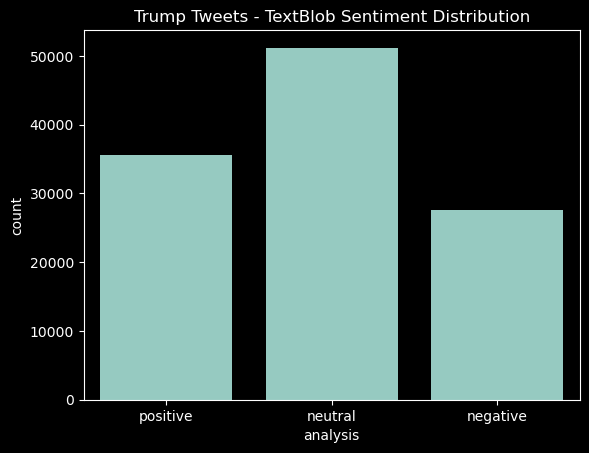

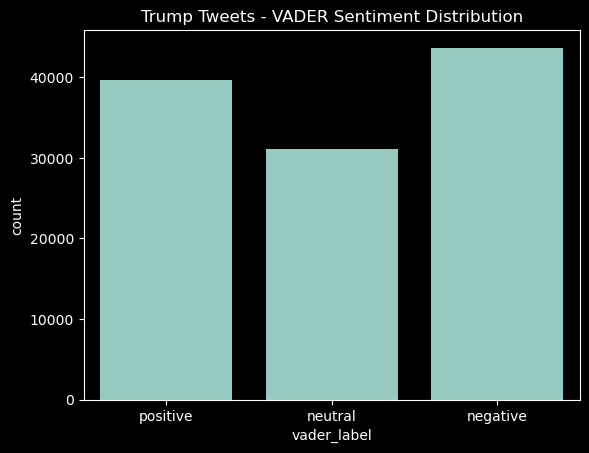

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='analysis', data=merged_trump)
plt.title("Trump Tweets - TextBlob Sentiment Distribution")
plt.show()

sns.countplot(x='vader_label', data=merged_trump)
plt.title("Trump Tweets - VADER Sentiment Distribution")
plt.show()


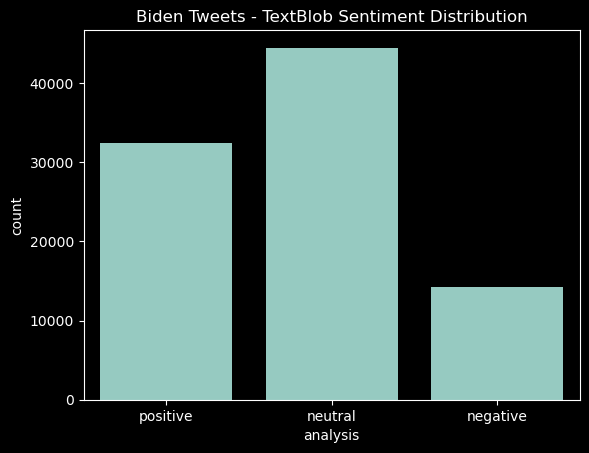

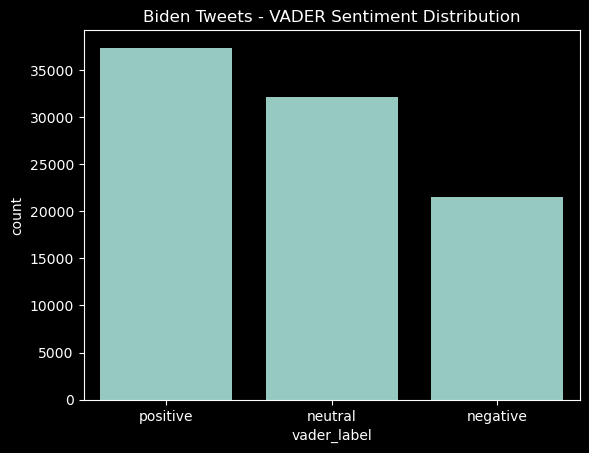

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order
sentiment_order = ['positive', 'neutral', 'negative']

# Apply categorical ordering to Biden's label column
merged_biden['analysis'] = pd.Categorical(merged_biden['analysis'], categories=sentiment_order, ordered=True)
merged_biden['vader_label'] = pd.Categorical(merged_biden['vader_label'], categories=sentiment_order, ordered=True)

sns.countplot(x='analysis', data=merged_biden, order = sentiment_order)
plt.title("Biden Tweets - TextBlob Sentiment Distribution")
plt.show()

sns.countplot(x='vader_label', data=merged_biden, order = sentiment_order)
plt.title("Biden Tweets - VADER Sentiment Distribution")
plt.show()
